In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

In [ ]:
jam_add_df=pd.read_csv("Jamboree_Admission.csv")
jam_add_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **Data Exploration**

---

1. Define Problem Statement and perform Exploratory Data Analysis

In [5]:
#Shape
jam_add_df.shape

(500, 9)

In [6]:
jam_add_df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
jam_add_df = jam_add_df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'})

In [8]:
#Datatype
jam_add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
#Statistical info
jam_add_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
jam_add_df.nunique()

,0
Serial No.,500
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [11]:
#Categorical Values
print("University Rating: ",np.sort(jam_add_df['University Rating'].unique()))
print("SOP: ",np.sort(jam_add_df['SOP'].unique()))
print("LOR: ",np.sort(jam_add_df['LOR'].unique()))
print("Research: ",np.sort(jam_add_df['Research'].unique()))

University Rating:  [1 2 3 4 5]
SOP:  [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
LOR:  [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
Research:  [0 1]


**Observations:**
* 'University Rating', 'SOP', 'LOR ', 'Research' can be converted to categorical value.

In [12]:
#missing values
def missing_values(df):
    missing_count=df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    missing_data = pd.DataFrame({
        'Missing Values': missing_count,
        'Percentage (%)': missing_percentage
    })
    return missing_data

missing_values(jam_add_df)

,Missing Values,Percentage (%)
Serial No.,0,0.0
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


**Observations:**
* No missing Values

## **Univariate Analysis**


---



In [13]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

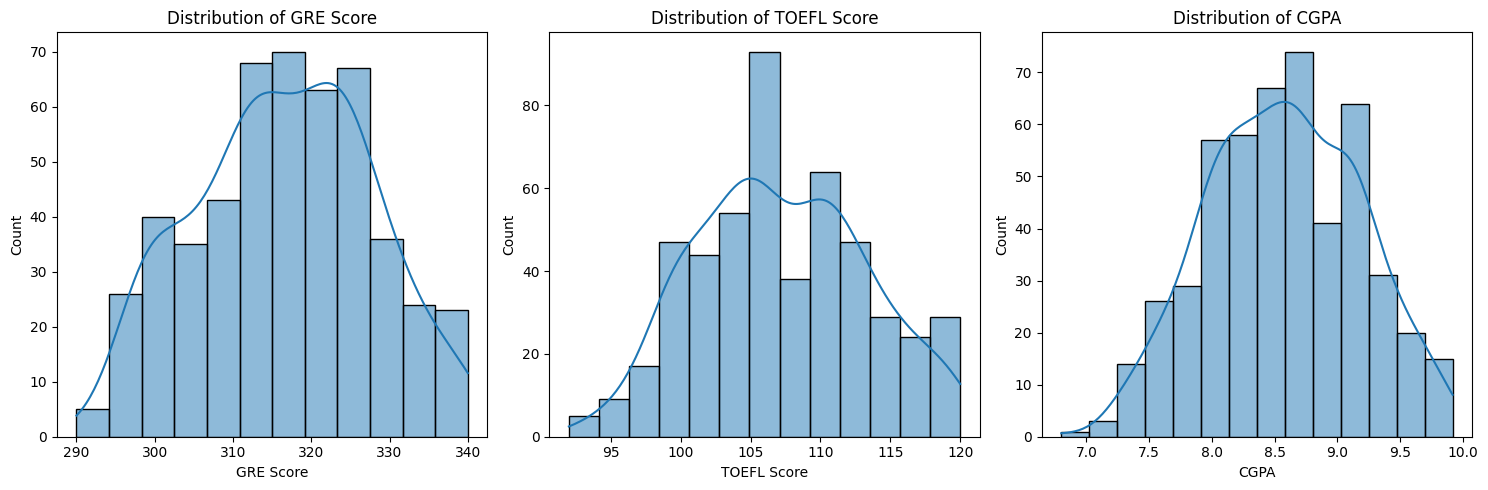

In [14]:
#Numerical Columns
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols):
  plt.subplot(1, 3, i + 1)
  sns.histplot(jam_add_df[col], kde=True)
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Observations:**

*   **GRE Score:** The distribution appears relatively symmetric, centered around 315-320. This suggests a fairly normal distribution of GRE scores in the dataset.
*   **TOEFL Score:** Similar to GRE, the TOEFL scores also seem to be symmetrically distributed, with the peak around 105-110.
*   **CGPA:** The CGPA distribution seems left-skewed, meaning there are more students with higher CGPA scores. The majority of students have a CGPA between 8.0 and 9.5.

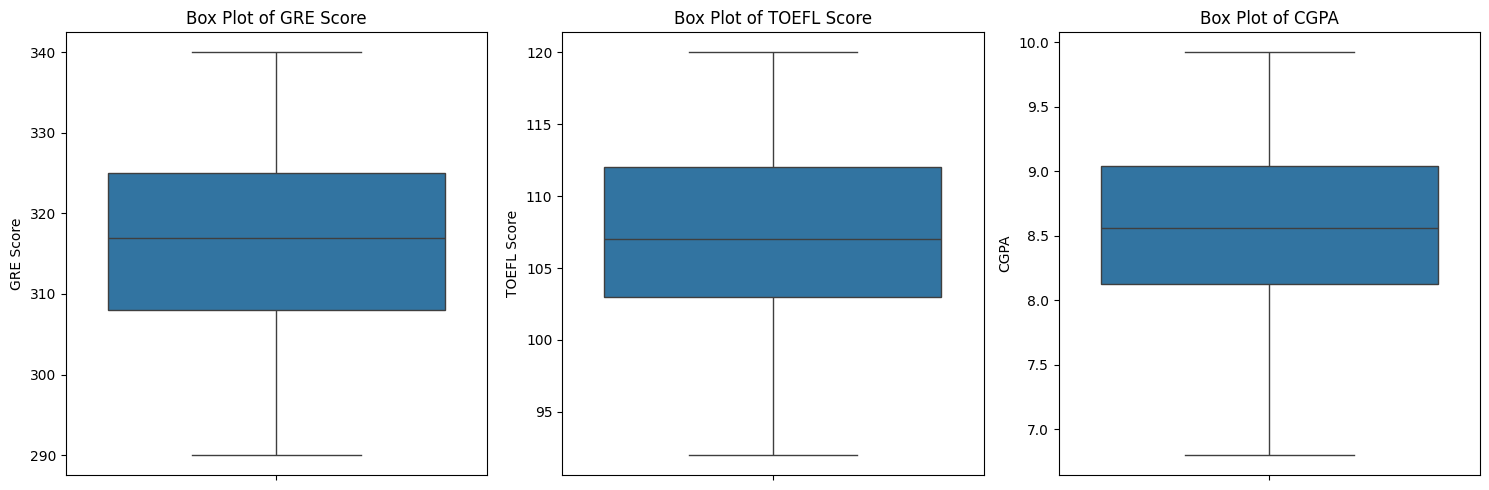

In [15]:
#boxplot
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols):
  plt.subplot(1, 3, i + 1)
  sns.boxplot(y=jam_add_df[col])
  plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

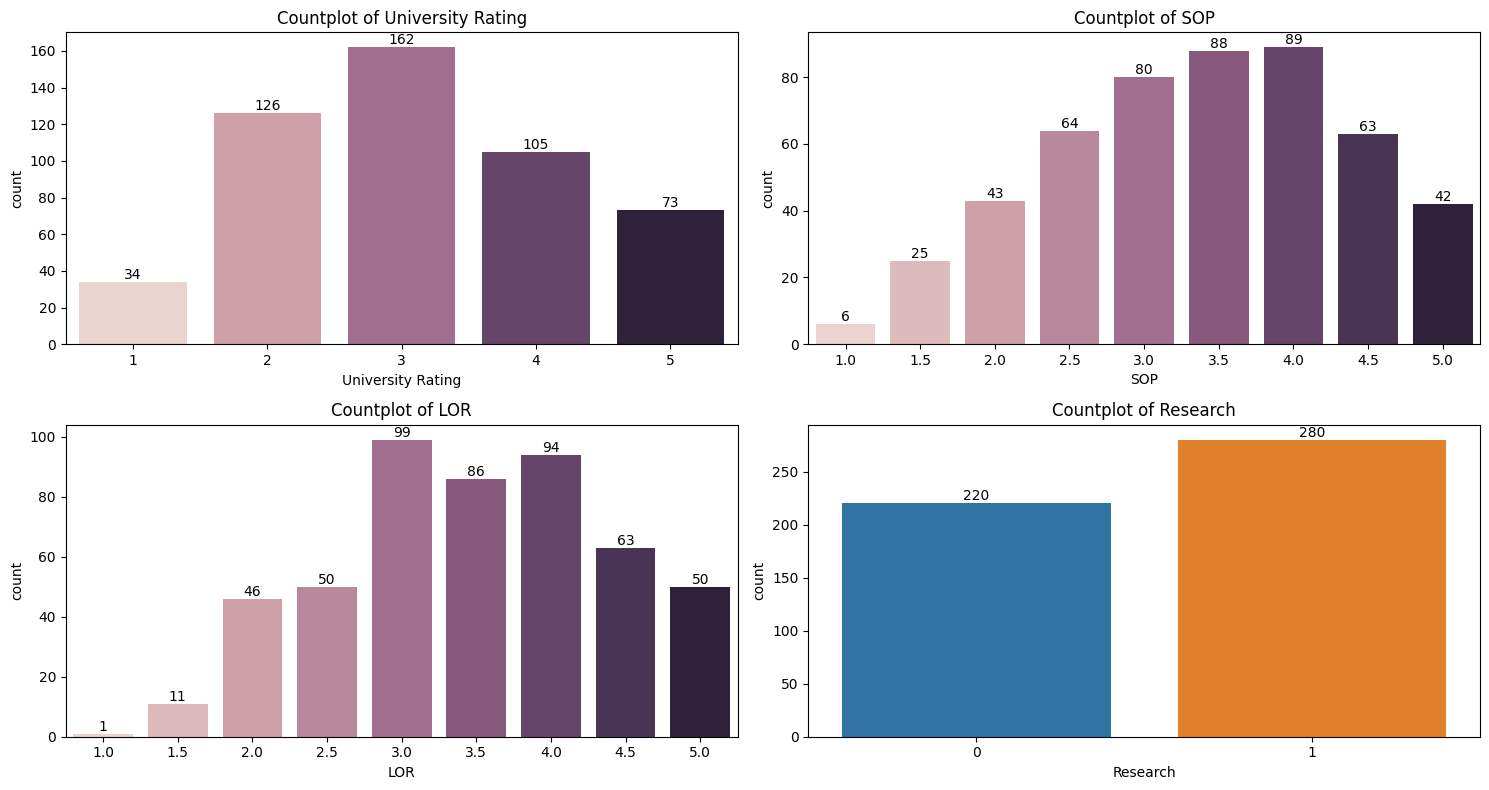

In [16]:
#Categorical Columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=col, data=jam_add_df, hue=col, legend=False)
    plt.title(f'Countplot of {col}')

    # Add count values on top of the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

**Observations:**

*   **University Rating:** The majority of applicants are from universities with ratings of 3, followed by 2 and 4. There are fewer applicants from universities with ratings of 1 and 5. This could indicate that more applicants apply from mid-tier universities or that these are the most common ratings in the dataset.
*   **SOP:** The distribution of SOP scores is relatively uniform across the different rating values, with slight peaks at 3.5 and 4. This suggests a good spread in the quality of Statements of Purpose among applicants.
*   **LOR:** The LOR scores are also spread out, with a notable peak at 3.0 and 4.0. This might indicate that many applicants have strong Letters of Recommendation.
*   **Research:** There's a difference in reserch paper count but is it significant for admission we will see later.


## **Bivariate Analysis**


---



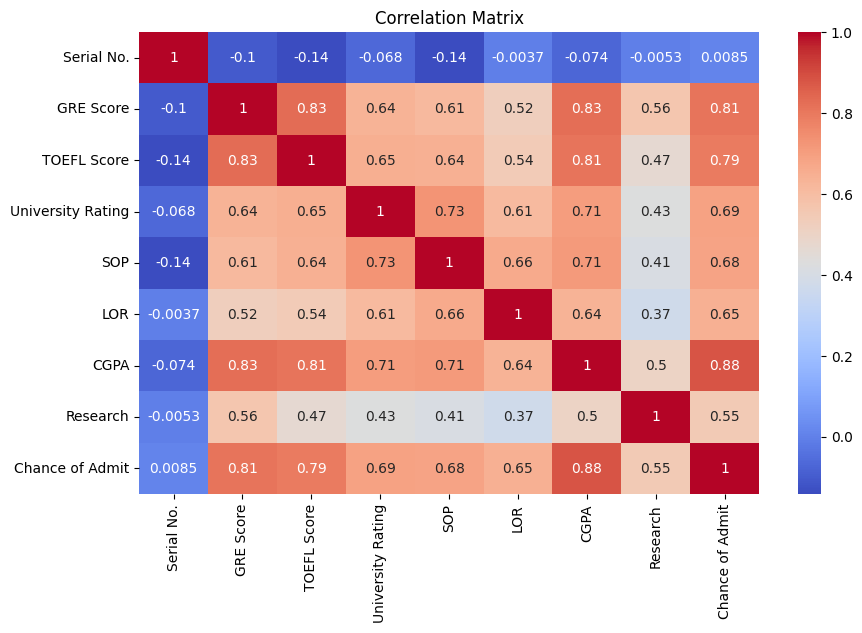

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(jam_add_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Observations:**

Insights from the correlation matrix:

1.  **Strong Positive Correlations with 'Chance of Admit ':**
    *   `CGPA` shows the strongest positive correlation with `Chance of Admit ` (0.88). This is a significant indicator that a higher CGPA is strongly associated with a higher chance of admission.
    *   `GRE Score` (0.81) and `TOEFL Score` (0.79) also have strong positive correlations with `Chance of Admit `. This suggests that higher standardized test scores are highly predictive of admission chances.
    *   `University Rating` (0.69) and `LOR ` (0.65) have moderate to strong positive correlations with `Chance of Admit `. Attending a higher-rated university and having strong Letters of Recommendation are associated with better admission prospects.
    *   `SOP` (0.68) also shows a moderate to strong positive correlation, indicating that a strong Statement of Purpose is linked to a higher chance of admission.
    *   `Research` (0.55) has a moderate positive correlation. While less strong than the other factors, having research experience is still positively associated with the chance of admission.

2. **Inter-feature Correlations:**
    *  The significant inter-correlations between `GRE Score`, `TOEFL Score`, and `CGPA` suggest that these metrics often go hand-in-hand and reflect overall academic strength.

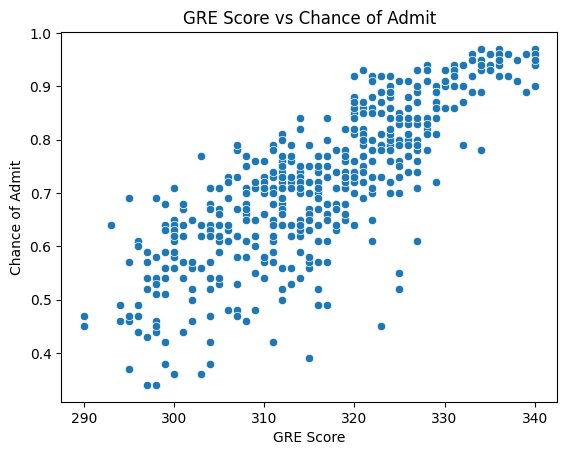

In [18]:
# GRE vs Chance of Admit
sns.scatterplot(x='GRE Score', y='Chance of Admit', data=jam_add_df)
plt.title('GRE Score vs Chance of Admit')
plt.show()

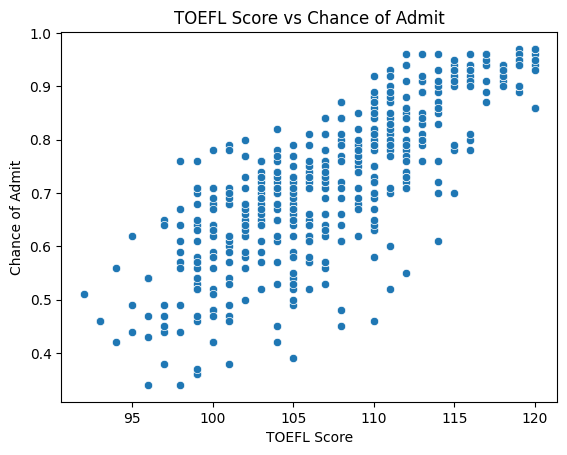

In [19]:
# TOEFL vs Chance of Admit
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data=jam_add_df)
plt.title('TOEFL Score vs Chance of Admit')
plt.show()

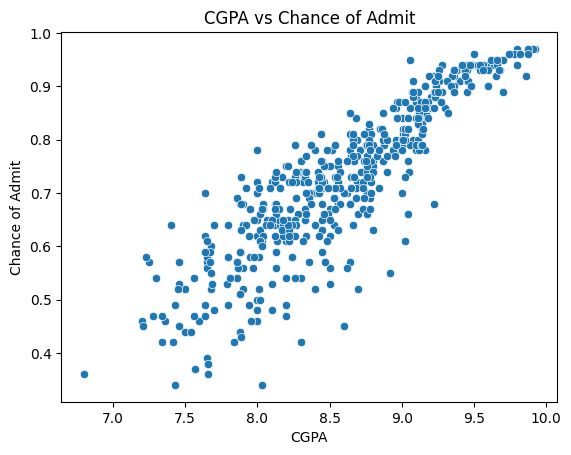

In [20]:
# CGPA vs Chance of Admit
sns.scatterplot(x='CGPA', y='Chance of Admit', data=jam_add_df)
plt.title('CGPA vs Chance of Admit')
plt.show()

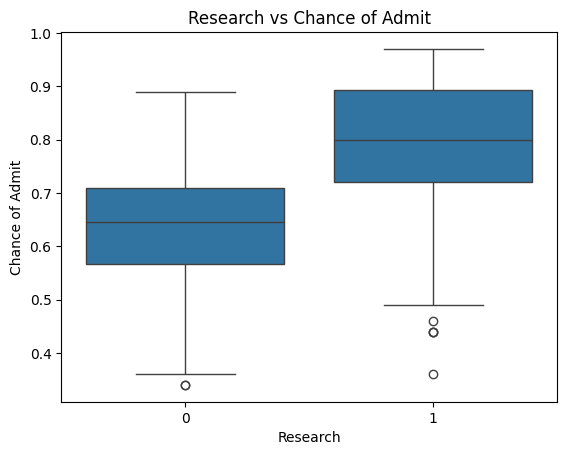

In [21]:
# Research vs Chance of Admit
sns.boxplot(x='Research', y='Chance of Admit', data=jam_add_df)
plt.title('Research vs Chance of Admit')
plt.show()

**Observations:**
*   **GRE Score vs Chance of Admit:** There is a clear positive linear relationship. As GRE scores increase, the chance of admission generally increases. The points form a roughly upward-sloping cloud.
*   **TOEFL Score vs Chance of Admit:** Similar to GRE, a positive linear relationship is observed. Higher TOEFL scores are associated with a higher chance of admission.
*   **CGPA vs Chance of Admit:** This plot shows a strong positive linear relationship, even more pronounced than with GRE and TOEFL. Higher CGPA is highly correlated with a higher chance of admission.
*   **Research vs Chance of Admit:** The box plot indicates that applicants with research experience (Research=1) have a significantly higher median chance of admit compared to those without research experience (Research=0). The distribution of chance of admit is also generally higher for those with research.

# **Data Preprocessing**

---

In [22]:
#duplicate check
print(jam_add_df.duplicated().sum())
print(jam_add_df.drop(columns=['Serial No.']).duplicated().sum())

0
0


**Observations:**
* No Duplicate rows

In [23]:
#missing value
missing_values(jam_add_df)

,Missing Values,Percentage (%)
Serial No.,0,0.0
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


**Observations:**
* No Null values

In [24]:
#Outlier detection using IQR Method
def data_stats(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # Handle non-numeric columns gracefully
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        count = df[column_name].count()
        unique_count = df[column_name].nunique()
        min_val = df[column_name].min()
        max_val = df[column_name].max()
        # For non-numeric columns, mean, std, percentiles are not defined
        mean_val = np.nan
        std_val = np.nan
        left_whisker = np.nan
        percentile_25 = np.nan
        percentile_50 = np.nan
        percentile_75 = np.nan
        right_whisker = np.nan
        left_outer_cnt=np.nan
        right_outer_cnt=np.nan
        total_outliers_per=np.nan
        return (count, unique_count, min_val, max_val, mean_val, std_val, left_whisker, percentile_25, percentile_50, percentile_75, right_whisker,total_outliers_per)

    # Calculate descriptive statistics
    count = df[column_name].count()
    unique_count = df[column_name].nunique()
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    mean_val = df[column_name].mean()
    std_val = df[column_name].std()

    # Calculate percentiles and whiskers
    q1 = df[column_name].quantile(0.25)
    median=df[column_name].median()
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    left_whisker = q1 - 1.5 * iqr
    if min_val>=0 and  left_whisker<0:   #for positive value point left wisker cannot be -ve
      left_whisker = 0
    right_whisker = q3 + 1.5 * iqr

    #left_outer_cnt=df[df[column_name]<left_whisker][column_name].count()
    #right_outer_cnt=df[df[column_name]>right_whisker][column_name].count()
    left_outer_cnt=np.sum(df[column_name]<left_whisker)
    right_outer_cnt=np.sum(df[column_name]>right_whisker)
    total_outliers_per=((left_outer_cnt+right_outer_cnt)*100)/count

    return (count, unique_count, min_val, max_val, mean_val, std_val, left_whisker, q1, median, q3, right_whisker,left_outer_cnt,right_outer_cnt,total_outliers_per)

In [25]:
numeric_cols_stats_list = []

for col in num_cols:
    stats = data_stats(jam_add_df, col)
    numeric_cols_stats_list.append(stats)

# Create a DataFrame from the stats
numeric_cols_stats_df = pd.DataFrame(
    numeric_cols_stats_list,
    index=num_cols,
    columns=["count", "unique", "min", "max", "mean", "std","left_whisker", "25%", "50%", "75%", "right_whisker","left_outlier_count","right_outlier_count","outlier%"])

numeric_cols_stats_df

,count,unique,min,max,mean,std,left_whisker,25%,50%,75%,right_whisker,left_outlier_count,right_outlier_count,outlier%
GRE Score,500,49,290.0,340.00,316.47200,11.295148,282.50000,308.0000,317.00,325.00,350.50000,0,0,0.0
TOEFL Score,500,29,92.0,120.00,107.19200,6.081868,89.50000,103.0000,107.00,112.00,125.50000,0,0,0.0
CGPA,500,184,6.8,9.92,8.57644,0.604813,6.75875,8.1275,8.56,9.04,10.40875,0,0,0.0


**Observations:**
* No outliers detected.

In [26]:
#Feature engineering
jam_add_df_new=jam_add_df.copy()
jam_add_df_new.drop('Serial No.', axis=1, inplace=True)


In [27]:
#Data Preparation
x = jam_add_df_new.drop('Chance of Admit', axis=1)
y = jam_add_df_new['Chance of Admit']


In [28]:
x_sm = sm.add_constant(x)  #adding bias
#split the data
x_train,x_test,y_train,y_test=train_test_split(x_sm,y,test_size=0.2,random_state=42)
x_train_cp=x_train.copy()

In [29]:
#standard scaling the numeric columns
scaler = StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])

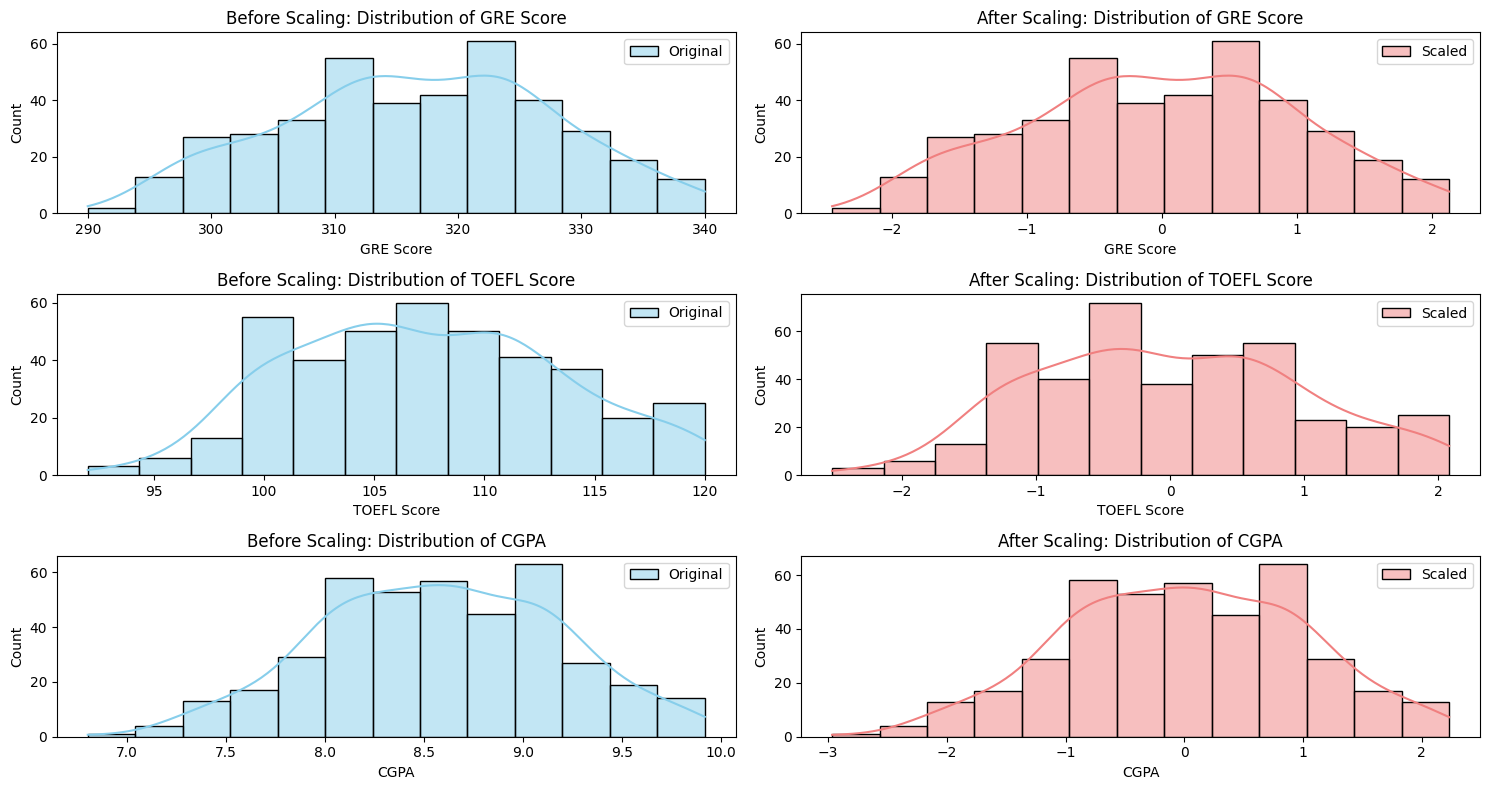

In [30]:
plt.figure(figsize=(15, 8))
plot_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
titles = ['Distribution of GRE Score', 'Distribution of TOEFL Score', 'Distribution of CGPA']
colors = ['skyblue', 'lightcoral']

for i, col in enumerate(plot_cols):
    # Before Scaling
    plt.subplot(3, 2, 2 * i + 1)
    sns.histplot(x_train_cp[col], kde=True, label='Original', color=colors[0])
    plt.title(f'Before Scaling: {titles[i]}')
    plt.legend()
    # After Scaling (using x_train which has been scaled)
    plt.subplot(3, 2, 2 * i + 2)
    sns.histplot(x_train[col], kde=True, label='Scaled', color=colors[1])
    plt.title(f'After Scaling: {titles[i]}')
    plt.legend()
plt.tight_layout()
plt.show()

In [31]:
#only transform the data for test
x_test[num_cols] = scaler.transform(x_test[num_cols])

# **Model building**


---



In [32]:
model = sm.OLS(y_train, x_train)   ## Create OLS model
ols_model=model.fit()     #fit the model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          3.41e-142
Time:                        16:24:36   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6367      0.01

In [33]:
#model coefficients with column names
print("\nCoefficients with variable names:")
print(pd.Series(ols_model.params.values, index=x_train.columns))


Coefficients with variable names:
const                0.636735
GRE Score            0.026671
TOEFL Score          0.018226
University Rating    0.002569
SOP                  0.001814
LOR                  0.017238
CGPA                 0.067581
Research             0.024027
dtype: float64


**Observations:**

**1. Model Summary**
* **R-squared:** The model explains 82.1% of the variance in Chance of Admit. This is strong.
* **Adjusted R-squared:** Still high, adjusts for number of predictors.

**2. Coefficients Interpretation**
* **University Rating** and **SOP** are not statistically significant predictors (**p > 0.05**). Check for multicollinearity.

In [34]:
#Ridge regression
ridge_model = Ridge(alpha=1.0, fit_intercept=True)
ridge_model.fit(x_train, y_train)
print(pd.Series(ridge_model.coef_, index=x_train.columns))


const                0.000000
GRE Score            0.026861
TOEFL Score          0.018345
University Rating    0.002680
SOP                  0.001970
LOR                  0.017253
CGPA                 0.067017
Research             0.023770
dtype: float64


In [35]:
#Lasso regression
lasso_model = Lasso(alpha=0.01, fit_intercept=True)
lasso_model.fit(x_train, y_train)
print(pd.Series(lasso_model.coef_, index=x_train.columns))

const                0.000000
GRE Score            0.029034
TOEFL Score          0.014250
University Rating    0.004338
SOP                  0.000000
LOR                  0.009661
CGPA                 0.068924
Research             0.000000
dtype: float64


In [36]:
results_df = pd.DataFrame({
    'OLS': ols_model.params.values,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_
}, index=x_train.columns)

results_df.rename(index={'const': 'Intercept'}, inplace=True)
results_df

,OLS,Ridge,Lasso
Intercept,0.636735,0.000000,0.000000
GRE Score,0.026671,0.026861,0.029034
TOEFL Score,0.018226,0.018345,0.014250
University Rating,0.002569,0.002680,0.004338
SOP,0.001814,0.001970,0.000000
LOR,0.017238,0.017253,0.009661
CGPA,0.067581,0.067017,0.068924
Research,0.024027,0.023770,0.000000


**Observations:**
* **SOP** and **Research** were set to **0.000** → Lasso identified them as less important and removed them from the model.
* **Ridge** slightly shrinks all coefficients but keeps every feature in the model.
* All models agree that **CGPA** has the **strongest impact** on the **Chance of Admit**.
* Coefficients for **GRE** and **TOEFL** are quite stable across all three models
* **LOR** influence reduced in Lasso.Suggests that **LOR** is only marginally useful once other features are in the model.

# **Linear Regression Assumptions**


---



## **No Multi-collinearity - VIF Check**


---



In [37]:
def calculate_vif(df, drop_cols):
    df_for_vif = df.copy()
    if drop_cols and len(drop_cols) > 0:
        df_for_vif = df_for_vif.drop(columns=drop_cols, errors='ignore')
    vif_data = pd.DataFrame()
    vif_data['feature'] = df_for_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
    return vif_data.sort_values(by='VIF', ascending=False)

In [38]:
calculate_vif(df=x_train,drop_cols=['const'])

,feature,VIF
3,SOP,29.184206
4,LOR,23.655997
2,University Rating,20.380135
0,GRE Score,4.484412
5,CGPA,3.685440
1,TOEFL Score,3.587640
6,Research,3.340733


In [39]:
#remove SOP
remove_col=['SOP']
x_train_vif = x_train.drop(columns=remove_col, errors='ignore')
model = sm.OLS(y_train, x_train_vif)   ## Create OLS model
ols_model_v2=model.fit()     #fit the model
print(ols_model_v2.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          2.01e-143
Time:                        16:24:36   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6396      0.01

**Observations:**
* **SOP**: No Impact in r2 and adjusted r2 - Not a relavent feature

In [40]:
calculate_vif(df=x_train,drop_cols=['const','SOP'])

,feature,VIF
2,University Rating,15.349914
3,LOR,14.695553
0,GRE Score,4.473157
4,CGPA,3.685391
1,TOEFL Score,3.575071
5,Research,3.317778


In [41]:
#remove SOP & University Rating
remove_col=['SOP','University Rating']
x_train_vif = x_train.drop(columns=remove_col, errors='ignore')
model = sm.OLS(y_train, x_train_vif)   ## Create OLS model
ols_model_v3=model.fit()     #fit the model
print(ols_model_v3.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        16:24:36   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6455      0.015     42.248      

**Observations:**
* **University Rating**: No Impact in r2 and adjusted r2 - Not a relavent feature

In [42]:
calculate_vif(df=x_train,drop_cols=['const','SOP','University Rating'])

,feature,VIF
0,GRE Score,4.467170
3,CGPA,3.682496
1,TOEFL Score,3.531874
4,Research,3.200374
2,LOR,2.796390


**Observations:**
* **'GRE Score', 'CGPA', 'TOEFL Score', 'Research', 'LOR'** are relevant info.

## **Mean of Residuals**


---



In [43]:
#remove SOP & University Rating
#model after VIF check
remove_col=['SOP','University Rating']
x_train_vif = x_train.drop(columns=remove_col, errors='ignore')
model = sm.OLS(y_train, x_train_vif)   ## Create OLS model
optimized_ols_model=model.fit()     #fit the model
print(optimized_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        16:24:36   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6455      0.015     42.248      

In [44]:
#mean residual
residuals = optimized_ols_model.resid
print("Mean of residuals:", np.mean(residuals))

Mean of residuals: -8.769374115757955e-16


## **Linearity of variables**


---



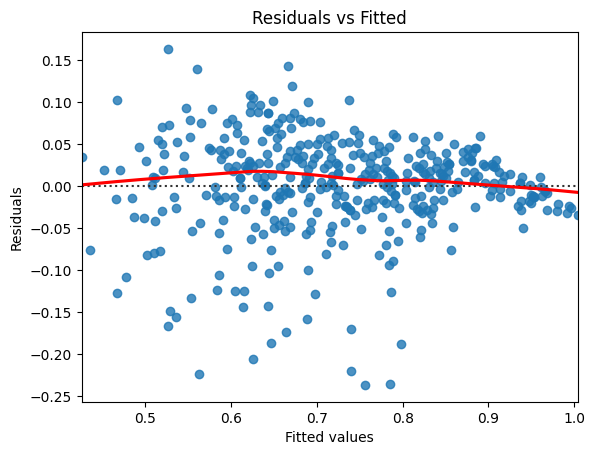

In [45]:
sns.residplot(x=optimized_ols_model.fittedvalues, y=residuals, lowess=True, line_kws={'color':'red'})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

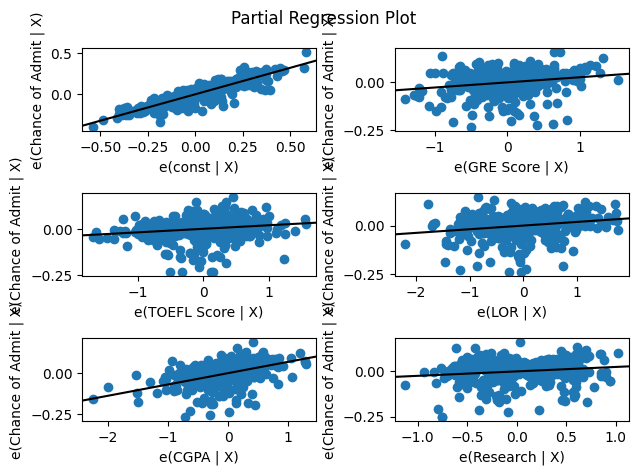

In [46]:
sm.graphics.plot_partregress_grid(optimized_ols_model)
plt.tight_layout()
plt.show()

**Observations:**
* Residuals are mostly centered around 0 with slight curvature and randon spread.
* Each independent variable is linear to dependent variable with spread.
* Mean of residual approx 0

## **Test for Homoscedasticity**


---



In [47]:
x_train_vif.head()

,const,GRE Score,TOEFL Score,LOR,CGPA,Research
249,1.0,0.389986,0.602418,4.0,0.415018,1
433,1.0,-0.066405,0.602418,5.0,-0.067852,0
19,1.0,-1.253022,-0.876917,3.0,-0.134454,0
322,1.0,-0.248961,-0.055064,4.0,-0.517420,0
332,1.0,-0.796631,-0.219435,2.5,-0.617324,1


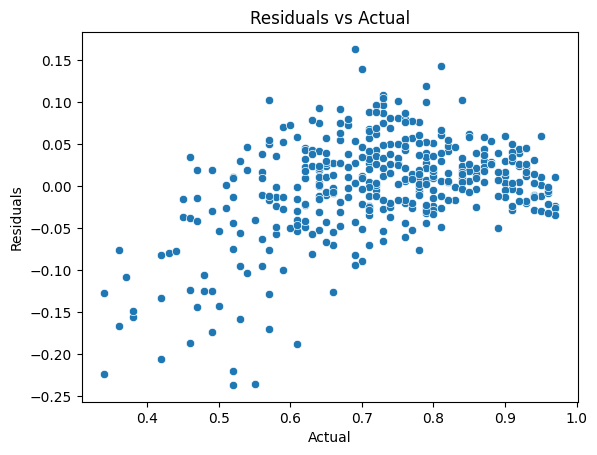

In [48]:
sns.scatterplot(x = y_train, y = residuals);
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual")
plt.show()

In [49]:
#Goldfeld Quant Test
f_stat, p_value, gp_extra  = sms.het_goldfeldquandt(y_train, x_train_vif)
print(f"Goldfeld-Quandt F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Homoscedasticity likely (fail to reject H₀)")
else:
    print("Heteroscedasticity detected (reject H₀)")

Goldfeld-Quandt F-statistic: 0.9592
p-value: 0.6139
Homoscedasticity likely (fail to reject H₀)


**Observations:**
* Statistical Test (Goldfeld Quandt): Confirms no significant heteroscedasticity.
* Graph Test: Minor variance spread, but largely random around 0

## **Normality of residuals**


---



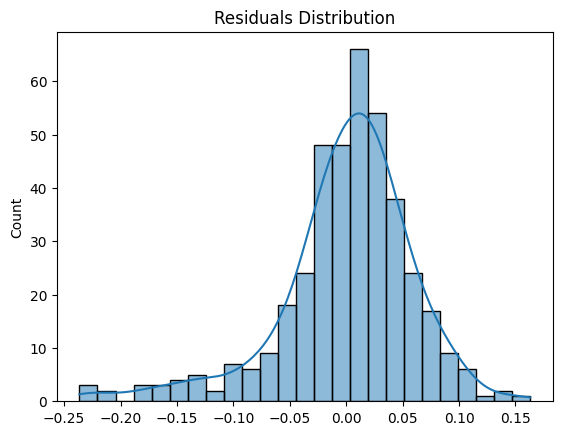

In [50]:
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

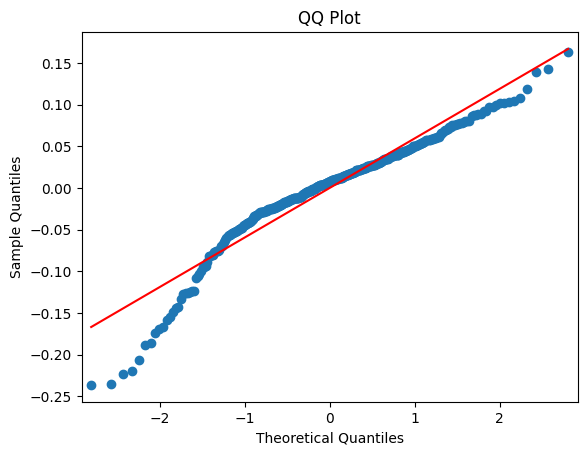

In [51]:
qqplot(residuals, line='s')
plt.title('QQ Plot')
plt.show()

**Observations:**
* **Distribution**:The histogram appears bell-shaped and symmetric.Minor deviations at the tails are acceptable in most practical scenarios.
* **QQ Plot**:The residuals mostly follow the red 45-degree reference line. Slight deviation is seen in the tail end shows little skewness.

**The residuals are approximately normal, which satisfies the normality assumption.**

# **Model performance evaluation**


---



In [52]:
print(optimized_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        16:24:38   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6455      0.015     42.248      

In [53]:
def evaluate_model(model,x,y):
  y_pred = model.predict(x)
  mae = mean_absolute_error(y, y_pred)
  rmse = np.sqrt(mean_squared_error(y, y_pred))
  r2 = r2_score(y, y_pred)

  n = len(y)
  d = x.shape[1]
  if n - d - 1 <= 0:
      adj_r2 = np.nan
  else:
      adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - d - 1))

  return (mae,rmse,r2,adj_r2)

In [54]:
#train dataset evaluation
ols_train_eval=evaluate_model(model=optimized_ols_model,x=x_train_vif,y=y_train)


#test dataset evaluation
remove_col=['SOP','University Rating']
x_test_vif = x_test.drop(columns=remove_col, errors='ignore')
ols_test_eval=evaluate_model(model=optimized_ols_model,x=x_test_vif,y=y_test)

In [55]:
eval_results_data = {
    'Metric': ['MAE', 'RMSE', 'R²', 'Adj R²'],
    'Train Dataset': ols_train_eval,
    'Test Dataset': ols_test_eval
}

performance_df = pd.DataFrame(eval_results_data)
performance_df

,Metric,Train Dataset,Test Dataset
0,MAE,0.042691,0.042923
1,RMSE,0.059440,0.061425
2,R²,0.820733,0.815500
3,Adj R²,0.817996,0.803597


**Observations:**

**R² (Coefficient of Determination):Train R²: 0.8207, Test R²: 0.8155**

  * The model explains over 82% (train) and 81.5% (test) of the variability in the target variable (Chance of Admit), which is excellent.
  * Very minimal drop between train and test → indicates no overfitting and strong generalization.

**MAE (Mean Absolute Error): Approx 0.043**
  * Very consistent between train and test, which suggests robustness.

**RMSE (Root Mean Squared Error):**
  * RMSE is slightly higher than MAE (expected).
  * Low and close across both sets, suggesting no significant outliers affecting the model negatively.

**Adjusted R²: Train: 0.8180, Test: 0.8036**
  * Shows that the model remains well-fitted even after adjusting for number of predictors.

## **Compare with other models**

In [56]:
x_train_vif.head(1)

,const,GRE Score,TOEFL Score,LOR,CGPA,Research
249,1.0,0.389986,0.602418,4.0,0.415018,1


In [57]:
x_test_vif.head(1)

,const,GRE Score,TOEFL Score,LOR,CGPA,Research
361,1.0,1.576604,1.424271,3.5,1.597217,1


In [58]:
remove_col=['const']
x_train_nw = x_train_vif.drop(columns=remove_col, errors='ignore')
x_test_nw = x_test_vif.drop(columns=remove_col, errors='ignore')

In [59]:
#Ridge regression
optimized_ridge_model = Ridge(alpha=1.0, fit_intercept=True)
optimized_ridge_model.fit(x_train_nw, y_train)
print(pd.Series(optimized_ridge_model.coef_, index=x_train_nw.columns))

GRE Score      0.027088
TOEFL Score    0.019276
LOR            0.018798
CGPA           0.068585
Research       0.024368
dtype: float64


In [60]:
#Lasso regression
optimized_lasso_model = Lasso(alpha=0.01, fit_intercept=True)
optimized_lasso_model.fit(x_train_nw, y_train)
print(pd.Series(optimized_lasso_model.coef_, index=x_train_nw.columns))

GRE Score      0.029635
TOEFL Score    0.015141
LOR            0.011045
CGPA           0.070404
Research       0.000000
dtype: float64


In [61]:
ridge_train_eval=evaluate_model(model=optimized_ridge_model,x=x_train_nw,y=y_train)
ridge_test_eval=evaluate_model(model=optimized_ridge_model,x=x_test_nw,y=y_test)
lasso_train_eval=evaluate_model(model=optimized_lasso_model,x=x_train_nw,y=y_train)
lasso_test_eval=evaluate_model(model=optimized_lasso_model,x=x_test_nw,y=y_test)

In [62]:
data = {
    ('Metric', ''): ['MAE', 'RMSE', 'R²', 'Adj R²'],
    ('OLS', 'Train'): ols_train_eval,
    ('OLS', 'Test'): ols_test_eval,
    ('Ridge', 'Train'): ridge_train_eval,
    ('Ridge', 'Test'): ridge_test_eval,
    ('Lasso', 'Train'): lasso_train_eval,
    ('Lasso', 'Test'): lasso_test_eval,
}

multi_col_performance_df = pd.DataFrame(data)

# Display the DataFrame
multi_col_performance_df

Metric       OLS               Ridge               Lasso          
              Train      Test     Train      Test     Train      Test
0     MAE  0.042691  0.042923  0.042693  0.042952  0.044234  0.043758
1    RMSE  0.059440  0.061425  0.059441  0.061462  0.061491  0.062793
2      R²  0.820733  0.815500  0.820729  0.815280  0.808147  0.807190
3  Adj R²  0.817996  0.803597  0.818454  0.805454  0.805713  0.796935

In [63]:
results_df = pd.DataFrame({
    'OLS': optimized_ols_model.params.values[1:],
    'Ridge': optimized_ridge_model.coef_,
    'Lasso': optimized_lasso_model.coef_
}, index=x_train_nw.columns)

results_df

,OLS,Ridge,Lasso
GRE Score,0.026879,0.027088,0.029635
TOEFL Score,0.019106,0.019276,0.015141
LOR,0.018696,0.018798,0.011045
CGPA,0.069066,0.068585,0.070404
Research,0.024601,0.024368,0.000000


**Observations:**
* Performance almost uniform accross all the models (OLS,Ridge,Lasso) for both train and test data.


**Note:**
* Lets see if removing Research from Lasso improves the model or not.

In [64]:
remove_col=['const','Research']
x_train_nw_v2 = x_train_vif.drop(columns=remove_col, errors='ignore')
x_test_nw_v2 = x_test_vif.drop(columns=remove_col, errors='ignore')

In [65]:
#Lasso regression
optimized_lasso_model_v2 = Lasso(alpha=0.01, fit_intercept=True)
optimized_lasso_model_v2.fit(x_train_nw_v2, y_train)
print(pd.Series(optimized_lasso_model_v2.coef_, index=x_train_nw_v2.columns))

GRE Score      0.029635
TOEFL Score    0.015141
LOR            0.011045
CGPA           0.070404
dtype: float64


In [66]:
lasso_train_eval_v2=evaluate_model(model=optimized_lasso_model_v2,x=x_train_nw_v2,y=y_train)
lasso_test_eval_v2=evaluate_model(model=optimized_lasso_model_v2,x=x_test_nw_v2,y=y_test)

In [67]:
lasso_v2_eval_results_data = {
    'Metric': ['MAE', 'RMSE', 'R²', 'Adj R²'],
    'Train Dataset': lasso_train_eval_v2,
    'Test Dataset': lasso_test_eval_v2
}

lasso_v2_performance_df = pd.DataFrame(lasso_v2_eval_results_data)
lasso_v2_performance_df

,Metric,Train Dataset,Test Dataset
0,MAE,0.044234,0.043758
1,RMSE,0.061491,0.062793
2,R²,0.808147,0.807190
3,Adj R²,0.806204,0.799072


In [68]:
data = {
    ('Metric', ''): ['MAE', 'RMSE', 'R²', 'Adj R²'],
    ('OLS', 'Train'): ols_train_eval,
    ('OLS', 'Test'): ols_test_eval,
    ('Ridge', 'Train'): ridge_train_eval,
    ('Ridge', 'Test'): ridge_test_eval,
    ('Lasso', 'Train'): lasso_train_eval,
    ('Lasso', 'Test'): lasso_test_eval,
    ('Lasso V2', 'Train'): lasso_train_eval_v2,
    ('Lasso V2', 'Test'): lasso_test_eval_v2,
}

multi_col_performance_df = pd.DataFrame(data)

# Display the DataFrame
multi_col_performance_df

Metric       OLS               Ridge               Lasso            \
              Train      Test     Train      Test     Train      Test   
0     MAE  0.042691  0.042923  0.042693  0.042952  0.044234  0.043758   
1    RMSE  0.059440  0.061425  0.059441  0.061462  0.061491  0.062793   
2      R²  0.820733  0.815500  0.820729  0.815280  0.808147  0.807190   
3  Adj R²  0.817996  0.803597  0.818454  0.805454  0.805713  0.796935   

   Lasso V2            
      Train      Test  
0  0.044234  0.043758  
1  0.061491  0.062793  
2  0.808147  0.807190  
3  0.806204  0.799072

In [69]:
lasso_v2_results_df = pd.DataFrame({
    'Lasso': optimized_lasso_model_v2.coef_
}, index=x_train_nw_v2.columns)

lasso_v2_results_df

,Lasso
GRE Score,0.029635
TOEFL Score,0.015141
LOR,0.011045
CGPA,0.070404


**Observations:**
* No change after removing the feature'Research'.

The model is
* Well-fitted
* Generalizes well
* Free from overfitting
* Statistically strong and interpretable

# **Insights & Recommendations**


---



## **Significance of predictor variables**


---



In [70]:
print(optimized_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        16:24:39   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6455      0.015     42.248      

In [71]:
results_df = pd.DataFrame({
    'OLS': optimized_ols_model.params.values[1:],
    'Ridge': optimized_ridge_model.coef_,
    'Lasso': optimized_lasso_model.coef_
}, index=x_train_nw.columns)

results_df.sort_values(by='OLS', ascending=False)

,OLS,Ridge,Lasso
CGPA,0.069066,0.068585,0.070404
GRE Score,0.026879,0.027088,0.029635
Research,0.024601,0.024368,0.000000
TOEFL Score,0.019106,0.019276,0.015141
LOR,0.018696,0.018798,0.011045


**Obsrvations:**
* **CGPA** is clearly the most influential factor in admission prediction across all models.

* **GRE Score** and **TOEFL Score** also play important and consistent roles.

* **Research** may not be as predictive on its own.

* **LOR** has a relatively modest impact.

##**Additional data sources for model improvement**


---



1. **Demographics**: Including attributes such as candidate demographics (e.g., country of origin, socio-economic information) may expose biases or provide additional predictive information if particular demographics tend to be historically over/under-represented or have differing academic journeys.

2. **University reputation**: Instead of just a single score, additional granular data on the applicant’s undergrad school (eg program rankings, strength of alumni network) may offer more context.

3. **Work Experience/Extracurriculars**: Information on work experience or substantial extracurricular activities could be very predictive of maturity, practical skills, and commitment, especially for graduate school.

4. **Program/Department Level**: For admission to specific programs, data on the demand for that program, the cohort size, and the specific criteria emphasized by that department could improve predictions.

## **Model implementation in the real world**


---

1. **Data Collection Pipeline:** Establishing robust and reliable data pipelines to collect, clean, and standardize data from various sources (application forms, testing agencies, universities) is crucial. Data quality directly impacts model performance.
2. **Integration with Existing Systems:** The model needs to be integrated into the university's existing admission application portal or student information system (SIS). This requires careful API design and data synchronization. Need to partner with individual unversity and agencies.Use frameworks like Flask, FastAPI, or Streamlit.
3. **User Interface for Admissions Officers:** A user-friendly interface is needed for admissions officers to input data, view model predictions, understand the factors influencing the prediction (model interpretability), and potentially override predictions based on qualitative assessments.
4. **Regular Model Monitoring:** Continuously monitor the model's performance in production. Track key metrics like accuracy, MAE, R² and Adj R² over time. Detect and address model drift (when performance degrades due to changes in the data distribution).
5. **Scalable:** Application should be easily deployed, versioned and scalable.
6. **Feedback Loop:** Establish a feedback loop where the actual admission outcomes are used to retrain and improve the model over time.

## **Potential business benefits from improving the model**
---
1. **Increased Efficiency in Admission Process:** Automating the initial screening or providing predictive scores can significantly reduce the manual workload for admissions officers, allowing them to focus on more qualitative aspects of applications.
2. **Better Matching of Students to Programs:** A more sophisticated model could potentially assess an applicant's fit for specific programs or departments, leading to higher student success rates and lower attrition.

3. **Better Preparation:** The model can also be used by applicants who are targetting specific Universities help them find their potential drawbacks and better preparation. They could provide specific training or curriculum to help the applicant.
4. **Data-Driven Strategic Planning:** Insights from the model can inform strategic decisions regarding recruitment efforts, marketing campaigns, and program development based on the characteristics of successful applicants.
5. **Marketing & Retargeting:** Target users who are “just below the cutoff”.Promote relevant services like GRE reattempt coaching or SOP improvement.
6. **Reduced Application Processing Costs:** Streamlining the review process through automation can lead to cost savings in administrative overhead. Can enable dynamic counseling fees or premium packages for high-probability students.
